# 1) Import Necessary Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline


# 2) Read in and Explore the Data

In [4]:
players = pd.read_csv("Players.csv")
teams = pd.read_csv("Teams.csv")

players.head()

,Rank,Player,Gold,Silver,Bronze,S Tier,Earnings
0,1,zombs,13,5,1,1,"$113,550"
1,2,ShahZaM,13,4,1,1,"$113,450"
2,3,dapr,14,3,1,1,"$112,870"
3,4,SicK,12,3,1,1,"$112,650"
4,5,cNed,12,4,2,1,"$107,735"


In [5]:
teams.head()

,Rank,Team,Gold,Silver,Bronze,S Tier,Earnings
0,1,Sentinels,12,3,1,1,"$561,500"
1,2,Acend,5,1,1,1,"$498,859"
2,3,Gambit Esports,8,3,0,1,"$495,638"
3,4,Team Liquid,4,2,2,0,"$295,374"
4,5,G2 Esports,7,2,1,0,"$257,925"


In [6]:
players.describe(), teams.describe()

(             Rank        Gold      Silver      Bronze      S Tier
 count  500.000000  500.000000  500.000000  500.000000  500.000000
 mean   250.424000    6.912000    4.054000    1.666000    0.030000
 std    144.452002    4.755364    2.576113    1.461066    0.170758
 min      1.000000    0.000000    0.000000    0.000000    0.000000
 25%    125.750000    3.000000    2.000000    1.000000    0.000000
 50%    250.500000    6.000000    4.000000    1.000000    0.000000
 75%    375.250000    9.000000    6.000000    2.000000    0.000000
 max    500.000000   26.000000   13.000000    8.000000    1.000000,
              Rank        Gold      Silver      Bronze      S Tier
 count  402.000000  402.000000  402.000000  402.000000  402.000000
 mean   201.467662    2.940299    2.069652    0.898010    0.007463
 std    116.169131    3.296854    1.910758    1.148368    0.086171
 min      1.000000    0.000000    0.000000    0.000000    0.000000
 25%    101.250000    1.000000    1.000000    0.000000    0.0

In [7]:
# checking dublicates
players.duplicated().sum(), teams.duplicated().sum()

(0, 0)

# 3) Data Analysis

In [8]:
players.dtypes, teams.dtypes

(Rank         int64
 Player      object
 Gold         int64
 Silver       int64
 Bronze       int64
 S Tier       int64
 Earnings    object
 dtype: object,
 Rank         int64
 Team        object
 Gold         int64
 Silver       int64
 Bronze       int64
 S Tier       int64
 Earnings    object
 dtype: object)

In [9]:
players.head()

,Rank,Player,Gold,Silver,Bronze,S Tier,Earnings
0,1,zombs,13,5,1,1,"$113,550"
1,2,ShahZaM,13,4,1,1,"$113,450"
2,3,dapr,14,3,1,1,"$112,870"
3,4,SicK,12,3,1,1,"$112,650"
4,5,cNed,12,4,2,1,"$107,735"


In [10]:
players.isnull().sum()

Rank        0
Player      0
Gold        0
Silver      0
Bronze      0
S Tier      0
Earnings    0
dtype: int64

In [11]:
teams.isnull().sum()

Rank        0
Team        0
Gold        0
Silver      0
Bronze      0
S Tier      0
Earnings    0
dtype: int64

In [12]:
# Lets get rid of dollar sign
players["Earnings"] = players["Earnings"].str.replace("$","").str.replace(",","")
teams["Earnings"] = teams["Earnings"].str.replace("$","").str.replace(",","")


C:\Users\fbegu\AppData\Local\Temp\ipykernel_10504\536147850.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  players["Earnings"] = players["Earnings"].str.replace("$","").str.replace(",","")
C:\Users\fbegu\AppData\Local\Temp\ipykernel_10504\536147850.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  teams["Earnings"] = teams["Earnings"].str.replace("$","").str.replace(",","")


In [13]:
players.head(), players.dtypes

(   Rank   Player  Gold  Silver  Bronze  S Tier Earnings
 0     1    zombs    13       5       1       1   113550
 1     2  ShahZaM    13       4       1       1   113450
 2     3     dapr    14       3       1       1   112870
 3     4     SicK    12       3       1       1   112650
 4     5     cNed    12       4       2       1   107735,
 Rank         int64
 Player      object
 Gold         int64
 Silver       int64
 Bronze       int64
 S Tier       int64
 Earnings    object
 dtype: object)

In [14]:
#Lets convert Earnings to numeric
players["Earnings"] = pd.to_numeric(players["Earnings"])
teams["Earnings"] = pd.to_numeric(teams["Earnings"])
players.dtypes, teams.dtypes

(Rank         int64
 Player      object
 Gold         int64
 Silver       int64
 Bronze       int64
 S Tier       int64
 Earnings     int64
 dtype: object,
 Rank         int64
 Team        object
 Gold         int64
 Silver       int64
 Bronze       int64
 S Tier       int64
 Earnings     int64
 dtype: object)

In [15]:
players.describe(include='all')

,Rank,Player,Gold,Silver,Bronze,S Tier,Earnings
count,500.000000,500,500.000000,500.000000,500.000000,500.000000,500.000000
unique,NaN,499,NaN,NaN,NaN,NaN,NaN
top,NaN,k1Ng,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,NaN,NaN,NaN,NaN,NaN
mean,250.424000,NaN,6.912000,4.054000,1.666000,0.030000,17646.662000
std,144.452002,NaN,4.755364,2.576113,1.461066,0.170758,19277.866853
min,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,5530.000000
25%,125.750000,NaN,3.000000,2.000000,1.000000,0.000000,7272.750000
50%,250.500000,NaN,6.000000,4.000000,1.000000,0.000000,10723.000000
75%,375.250000,NaN,9.000000,6.000000,2.000000,0.000000,18471.750000


Seems like one player appear 2 times since there is 499 unique values.

In [16]:
teams.describe(include="all")

,Rank,Team,Gold,Silver,Bronze,S Tier,Earnings
count,402.000000,402,402.000000,402.000000,402.000000,402.000000,402.000000
unique,NaN,402,NaN,NaN,NaN,NaN,NaN
top,NaN,Sentinels,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN
mean,201.467662,NaN,2.940299,2.069652,0.898010,0.007463,26015.733831
std,116.169131,NaN,3.296854,1.910758,1.148368,0.086171,57832.080856
min,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,92.000000
25%,101.250000,NaN,1.000000,1.000000,0.000000,0.000000,3909.500000
50%,201.500000,NaN,2.000000,2.000000,1.000000,0.000000,8814.000000
75%,301.750000,NaN,4.000000,3.000000,1.000000,0.000000,22486.250000


# 4) Data Visualization

In [17]:
# calculating total medals in players data
players["Medals"] = players["Gold"] + players["Silver"] + players["Bronze"]
players["Medals"]

0      19
1      18
2      18
3      16
4      18
       ..
495     8
496     5
497    14
498    31
499    12
Name: Medals, Length: 500, dtype: int64

In [18]:
# features list for charts
column_list = ["Medals", "Gold", "Silver", "Bronze", "Earnings"]

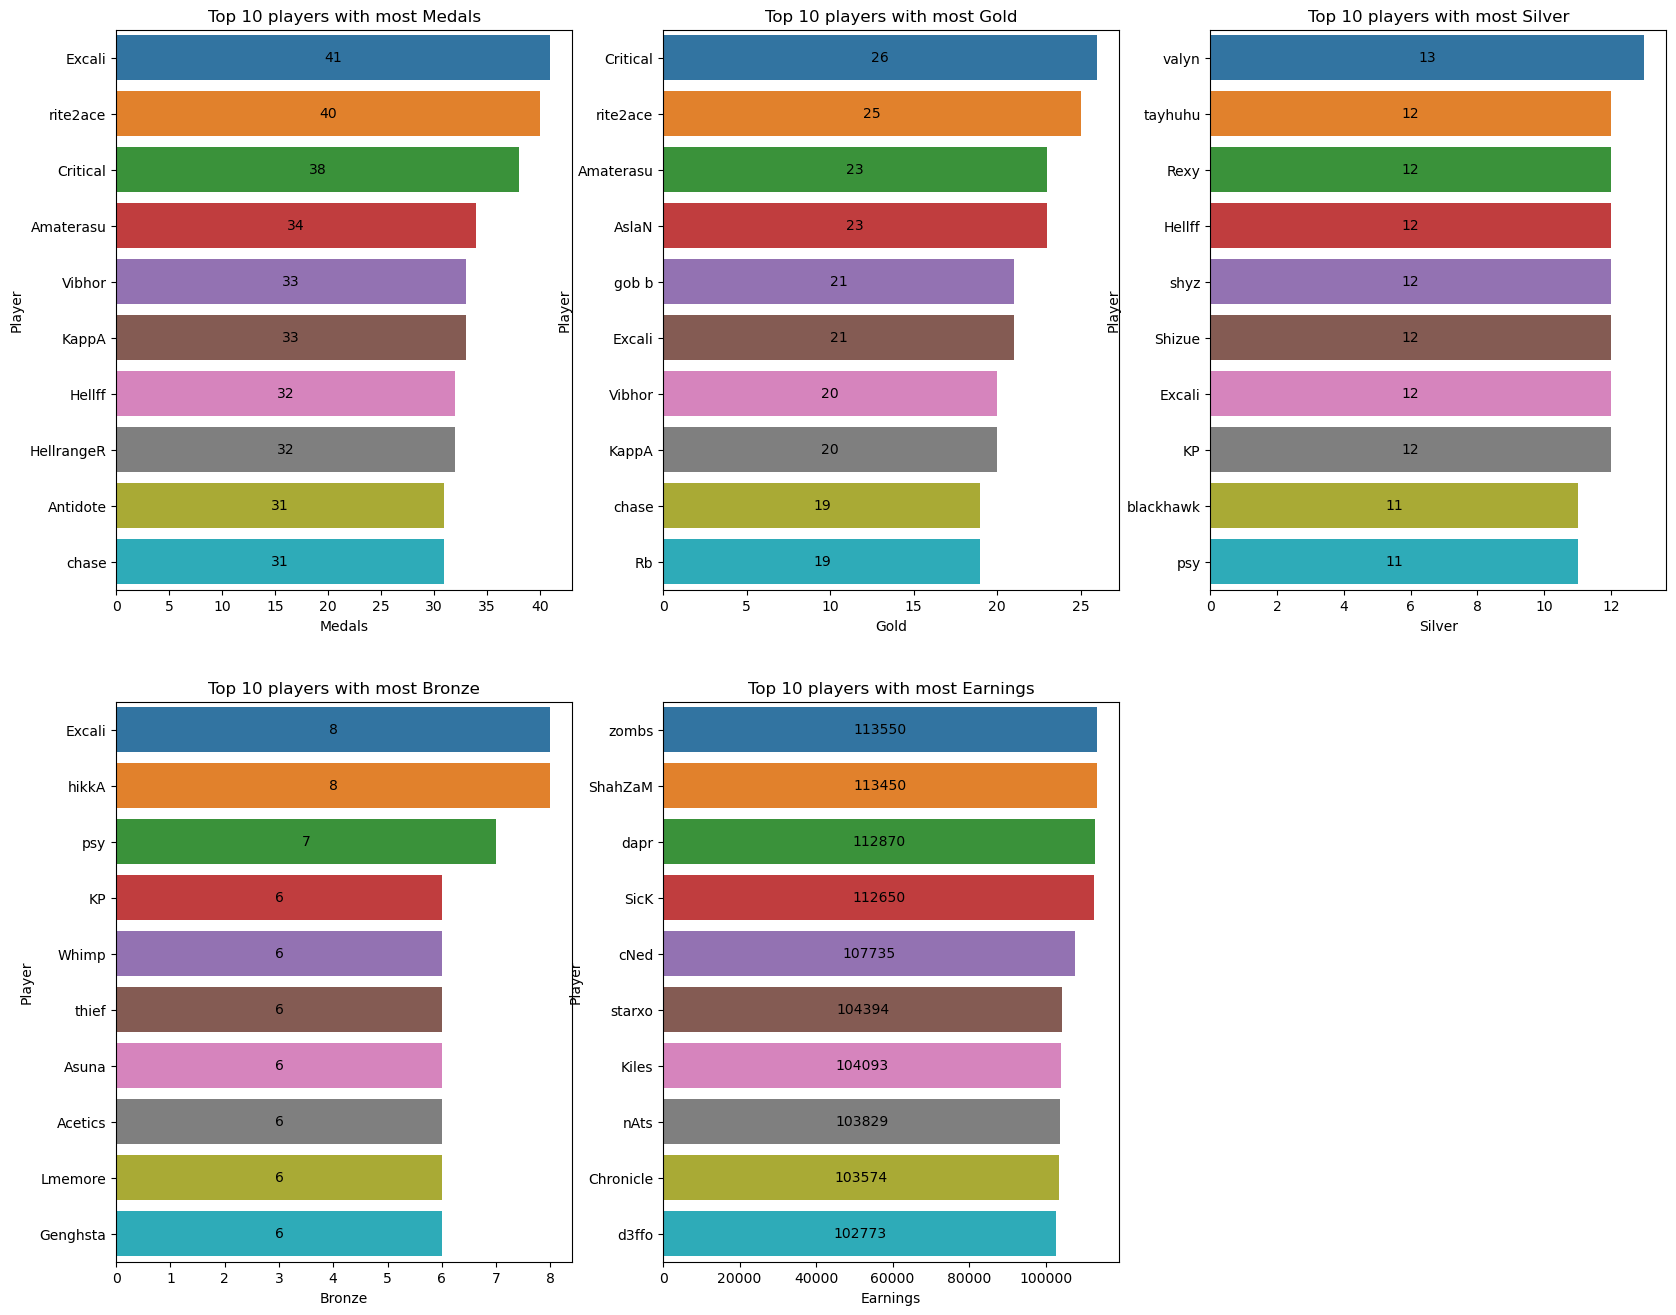

In [19]:
# Top 10 in different features of players data
plt.figure(figsize=(20,16))
for i, col in enumerate(column_list):
    plt.subplot(2,3,i+1)
    ax = sns.barplot(data=players.sort_values(by=col,ascending=False).head(10), x=col, y="Player")
    ax.bar_label(ax.containers[0], label_type="center")
    plt.title(f"Top 10 players with most {col}")

plt.show();

#plt.subplot(1, 2, 1)
#the figure has 1 row, 2 columns, and this plot is the first plot.

In [20]:
players_group = players.groupby("S Tier").sum().reset_index()
players_group


C:\Users\fbegu\AppData\Local\Temp\ipykernel_10504\541569687.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  players_group = players.groupby("S Tier").sum().reset_index()


,S Tier,Rank,Gold,Silver,Bronze,Earnings,Medals
0,0,125092,3290,1967,816,7251250,6073
1,1,120,166,60,17,1572081,243


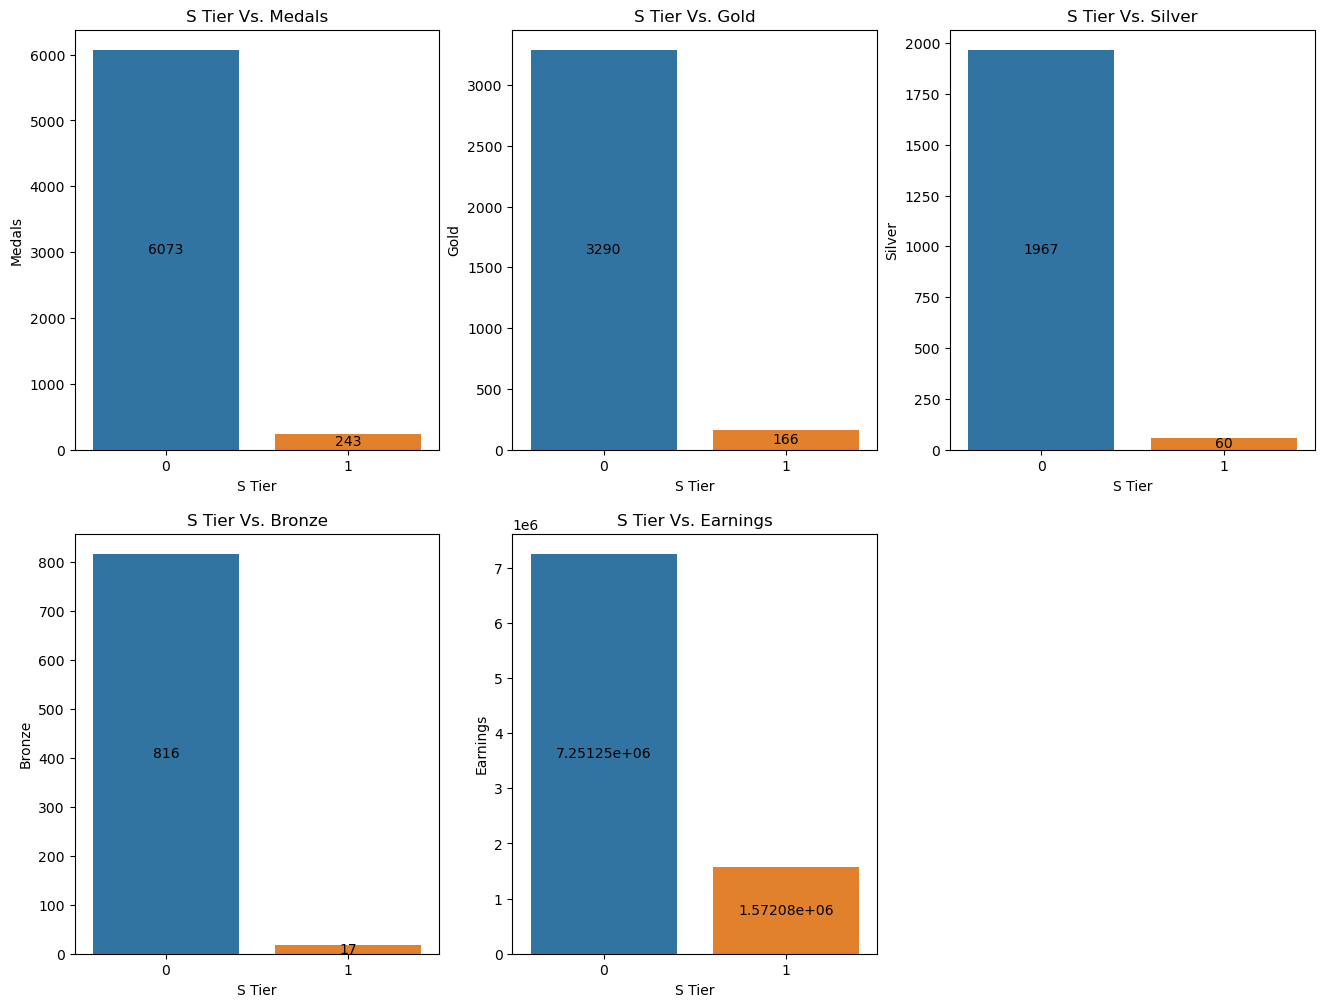

In [21]:
plt.figure(figsize=(16,12))
for i, col in enumerate(column_list):
    plt.subplot(2,3,i+1)
    ax = sns.barplot(data=players_group, x="S Tier", y= col)
    ax.bar_label(ax.containers[0], label_type="center")
    plt.title(f"S Tier Vs. {col}")
plt.show();

In [22]:
# Players with S Tier rating 1
players[players["S Tier"]==1] 

,Rank,Player,Gold,Silver,Bronze,S Tier,Earnings,Medals
0,1,zombs,13,5,1,1,113550,19
1,2,ShahZaM,13,4,1,1,113450,18
2,3,dapr,14,3,1,1,112870,18
3,4,SicK,12,3,1,1,112650,16
4,5,cNed,12,4,2,1,107735,18
5,6,starxo,12,4,1,1,104394,17
6,7,Kiles,6,4,2,1,104093,12
7,8,nAts,14,6,0,1,103829,20
8,9,Chronicle,13,6,0,1,103574,19
9,10,d3ffo,12,4,2,1,102773,18


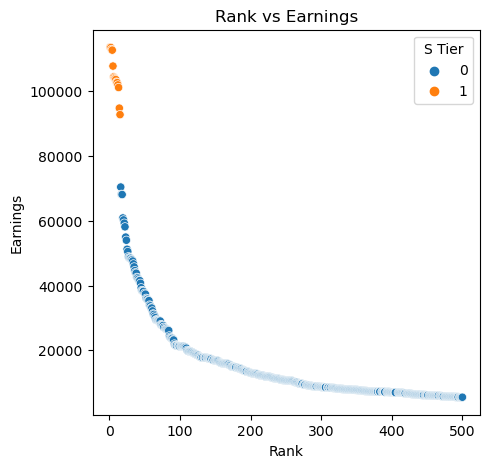

In [23]:
# Relationship between Rank and Earnings
plt.figure(figsize=(5,5))
sns.scatterplot(data=players, x="Rank",y="Earnings", hue='S Tier')
plt.title("Rank vs Earnings")
plt.show();


So we understood that rank and earnings are inversely related. Thus, if a player has a higher rank, it means his earnings may not much.

In [24]:
# calculating total medals
players["Medals"].count()

500

In [25]:
teams.head()

,Rank,Team,Gold,Silver,Bronze,S Tier,Earnings
0,1,Sentinels,12,3,1,1,561500
1,2,Acend,5,1,1,1,498859
2,3,Gambit Esports,8,3,0,1,495638
3,4,Team Liquid,4,2,2,0,295374
4,5,G2 Esports,7,2,1,0,257925


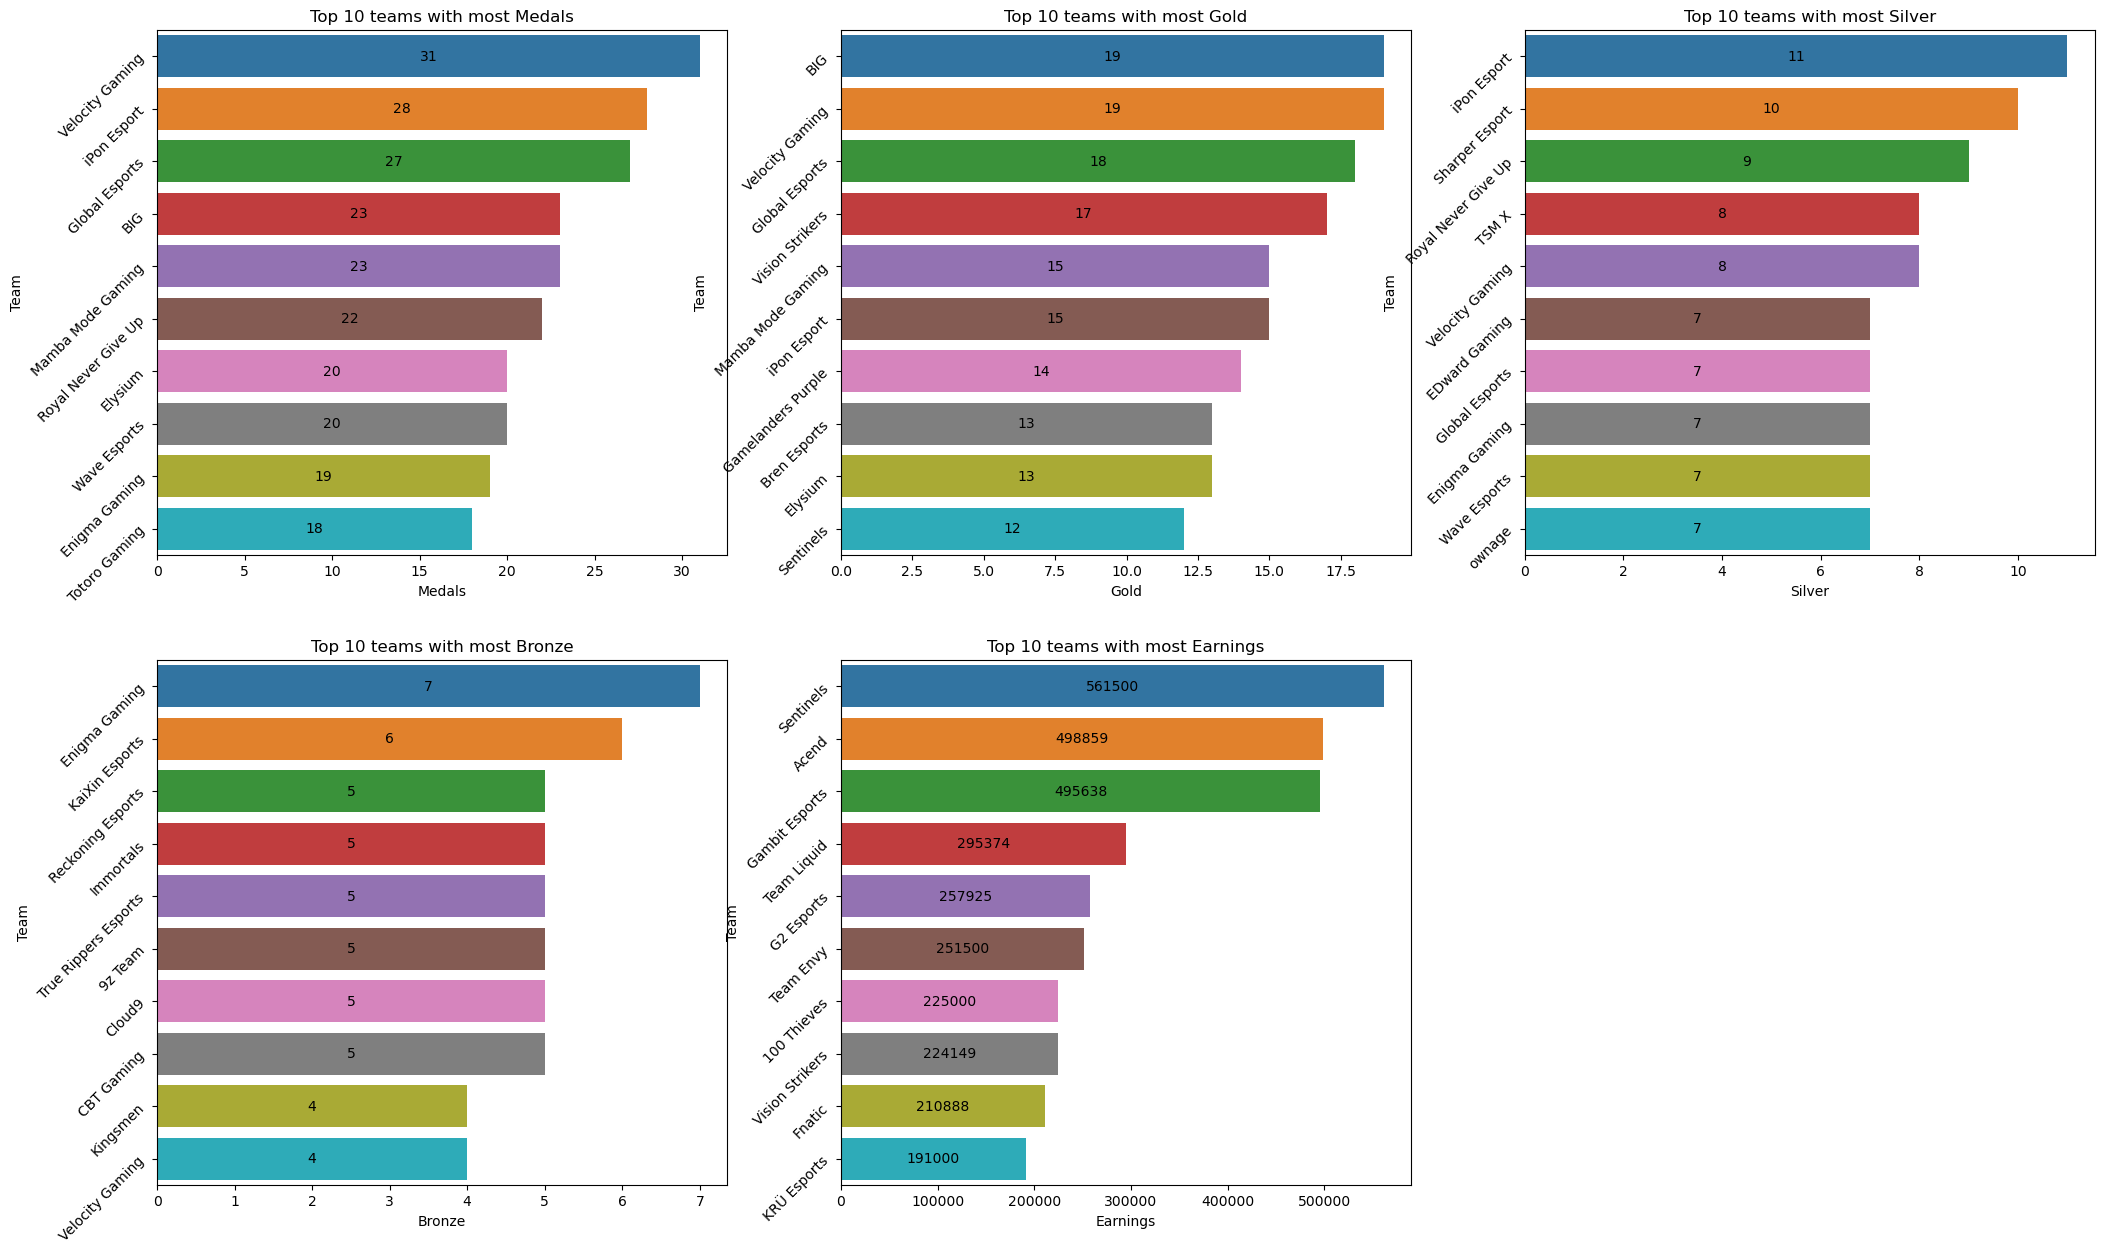

In [26]:
# Top 10 in different features of teams data

teams['Medals'] = teams['Gold'] + teams['Silver'] + teams['Bronze']
plt.figure(figsize=(25,15))
for i, col in enumerate(column_list):
    plt.subplot(2,3,i+1)
    ax = sns.barplot(data=teams.sort_values(by=col, ascending=False).head(10), x=col, y="Team")
    ax.bar_label(ax.containers[0], label_type="center")
    plt.yticks(rotation=45)
    plt.title(f"Top 10 teams with most {col}")
plt.show();



C:\Users\fbegu\AppData\Local\Temp\ipykernel_10504\2137584769.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=teams.corr(), annot=True)


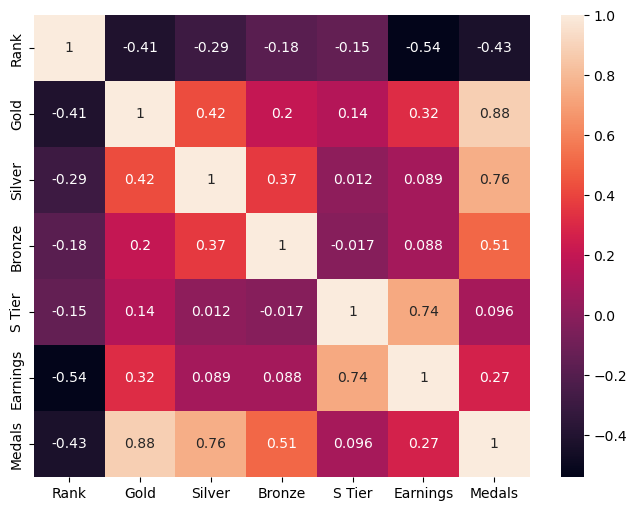

In [28]:
#Relation between medals and earnings

plt.figure(figsize=(8,6))
sns.heatmap(data=teams.corr(), annot=True)
plt.show();

In [29]:
# Grouping data based on S tier
teams_grouping = teams.groupby("S Tier").sum().reset_index()
teams_grouping

C:\Users\fbegu\AppData\Local\Temp\ipykernel_10504\490581555.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  teams_grouping = teams.groupby("S Tier").sum().reset_index()


,S Tier,Rank,Gold,Silver,Bronze,Earnings,Medals
0,0,80984,1157,825,359,8902328,2341
1,1,6,25,7,2,1555997,34


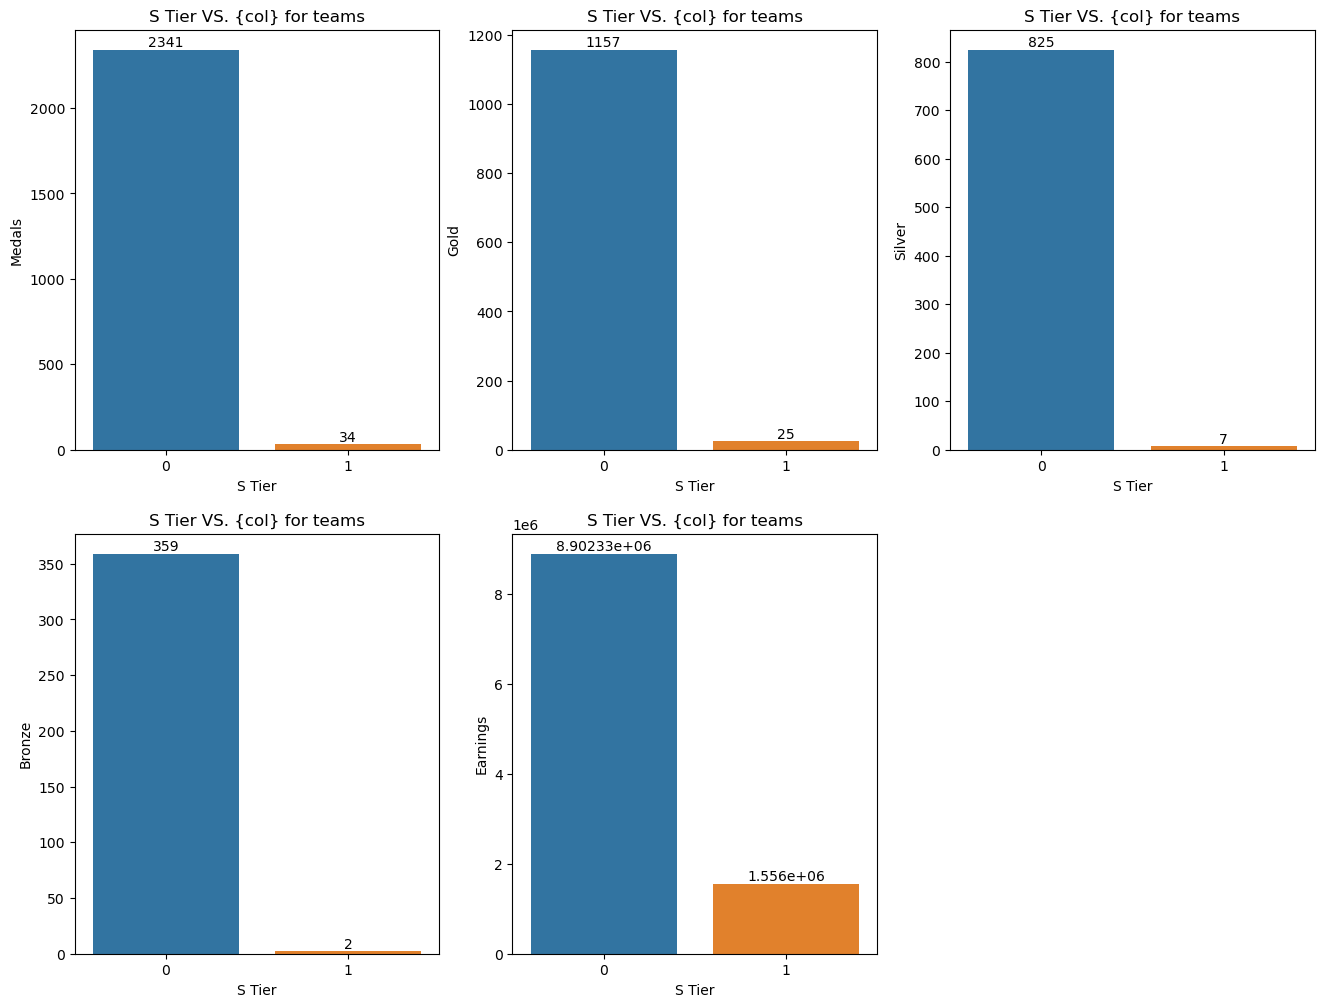

In [30]:
# Teams S Tier charts

plt.figure(figsize=(16,12))
for i, col in enumerate(column_list):
    plt.subplot(2,3,i+1)
    ax = sns.barplot(data=teams_grouping, x="S Tier", y=col)
    ax.bar_label(ax.containers[0])
    plt.title("S Tier VS. {col} for teams")
plt.show();
    

In [31]:
# Teams with S Tier rating 1
teams[teams["S Tier"]==1]

,Rank,Team,Gold,Silver,Bronze,S Tier,Earnings,Medals
0,1,Sentinels,12,3,1,1,561500,16
1,2,Acend,5,1,1,1,498859,7
2,3,Gambit Esports,8,3,0,1,495638,11


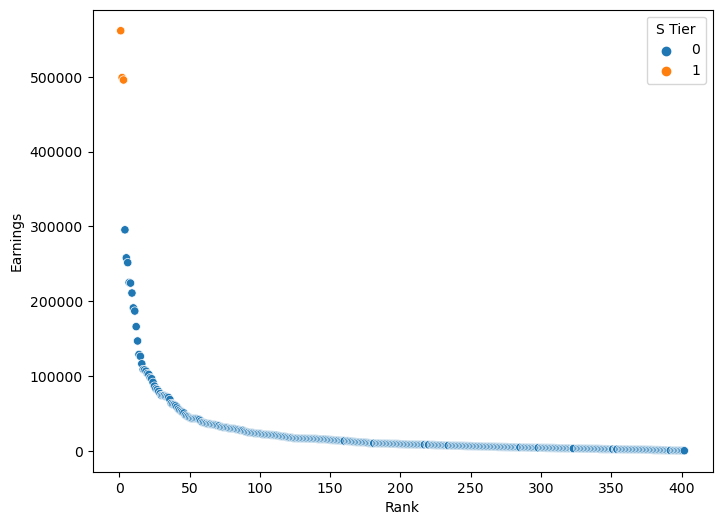

In [32]:
# Relationship between Rank and Earnings

plt.figure(figsize=(8,6))
sns.scatterplot(data=teams, x="Rank", y="Earnings", hue="S Tier")
plt.show();

Rank and Earnings are inversly related.

In [52]:
players.head(20)

,Rank,Player,Gold,Silver,Bronze,S Tier,Earnings,Medals
0,1,zombs,13,5,1,1,113550,19
1,2,ShahZaM,13,4,1,1,113450,18
2,3,dapr,14,3,1,1,112870,18
3,4,SicK,12,3,1,1,112650,16
4,5,cNed,12,4,2,1,107735,18
5,6,starxo,12,4,1,1,104394,17
6,7,Kiles,6,4,2,1,104093,12
7,8,nAts,14,6,0,1,103829,20
8,9,Chronicle,13,6,0,1,103574,19
9,10,d3ffo,12,4,2,1,102773,18


In [55]:
players.iloc[478]

count       8
unique      8
top       479
freq        1
Name: 478, dtype: int64